# sub-n-classes, Tsallis Entropy labelling, looped

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
import time
from numpy.random import *
import itertools

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action = 'ignore', category = FutureWarning)

/home/killerqueen/.pyenv/versions/3.6.7/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# entropy labelling
def tsallis_ent_label(q, probas, s_cls):
    elements = np.power(probas, q - 1)
    # thrshld in tsallis entropy model
    ts_thrshld = np.sum(np.power(probas, q))
    if q < 1:
        labels = np.array([s_cls[i] for i, e in enumerate(elements) if e <= ts_thrshld])
    else:
        labels = np.array([s_cls[i] for i, e in enumerate(elements) if e >= ts_thrshld])
    
    return labels

In [3]:
def factorial(n):
    if n == 0:
        return 1
    elif n > 0:
        return n*factorial(n - 1)
    else:
        print("sth wrong")

In [4]:
# entropy labelling
def tsallis_ent_label(q, probas, s_cls):
    elements = np.power(probas, q - 1)
    # thrshld in tsallis entropy model
    ts_thrshld = np.sum(np.power(probas, q))
    if q < 1:
        labels = np.array([s_cls[i] for i, e in enumerate(elements) if e <= ts_thrshld])
    else:
        labels = np.array([s_cls[i] for i, e in enumerate(elements) if e >= ts_thrshld])
    
    return labels

In [5]:
# labelling and evaluating them
def tsallis_ent_scls_eval(q, classes, orig_A, lim_A):

    s_cls = classes

    # extract dataset of chosen classes
    trn_imgs = [img for i, img in enumerate(train_imgs) if train_labels[i] in s_cls]
    trn_labels = [label for label in train_labels if label in s_cls]

    tst_imgs = [img for i, img in enumerate(test_imgs) if test_labels[i] in s_cls]
    tst_labels = [label for label in test_labels if label in s_cls]

    # generate an annotator
    a1_model = LR().fit(trn_imgs[:orig_A], trn_labels[:orig_A])
    a1_proba = a1_model.predict_proba(trn_imgs[orig_A:orig_A + lim_A])

    # entropy labelling
    mul_labels = [tsallis_ent_label(q, probas, s_cls) for probas in a1_proba]
    
    # labels score evaluation
    score = 0
    for labels, t_label in zip(mul_labels, trn_labels[orig_A:orig_A + lim_A]):
        for l in labels:
            if (l == t_label):
                score += 1

    m_labels = []
    for labels in mul_labels:
         [m_labels.append(l) for l in labels]                
                    
    return (len(m_labels)/lim_A, score*100/len(m_labels), score*100/lim_A)

## MNIST

In [6]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_imgs = np.array([x.ravel() for x in train_images])
test_imgs = np.array([y.ravel() for y in test_images])

img_SIZE = train_images.shape[1]*train_images.shape[2]

Using TensorFlow backend.


### labels evalutaiton

In [16]:
classes = [i for i in range(10)]
orig_A1, lim_A1 = 5, 2000
q = 1.5
mnist_evals = []

fact_10 = factorial(10)
for k in range(2, 11):
    a, b, c = 0, 0, 0
    if k == 10:
        sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, classes, orig_A1, lim_A1)
        mnist_evals.append((sample_lnum, sample_lqual, sample_lqual2))
    else:
        combi_nk = fact_10//(factorial(k)*factorial(10 - k))
        for scls in itertools.combinations(classes, k):
            sample_lnum, sample_lqual, sample_lqual2 = tsallis_ent_scls_eval(q, list(scls), orig_A1, lim_A1)
            a += sample_lnum
            b += sample_lqual
            c += sample_lqual2
        mnist_evals.append((a/combi_nk, b/combi_nk, c/combi_nk))
        
print(f"evaluation of labels genereated for mnist; (# of labels per image, labels quality [%], lebels quality as groups [%])\n{mnist_evals}")

evaluation of labels genereated for mnist; (# of labels per image, labels quality [%], lebels quality as groups [%])
[(1.0, 83.75777777777776, 83.75777777777776), (1.0055166666666664, 71.31024231717437, 71.71624999999999), (1.0114380952380952, 57.290647712824295, 57.98309523809526), (1.017291666666666, 45.81609002578713, 46.64285714285713), (1.0248380952380953, 38.837740175382336, 39.828095238095244), (1.0324166666666665, 33.004172895144954, 34.09875000000001), (1.0395333333333332, 28.189785216805312, 29.317777777777778), (1.0451, 26.308445880436672, 27.475), (1.04, 30.096153846153847, 31.3)]


### 結果ベタ打ち 消すな

In [17]:
# orig_A = 2000
# q = 1.5 
mnist_evals1 = [(1.0, 83.75777777777776, 83.75777777777776), (1.0055166666666664, 71.31024231717437, 71.71624999999999), (1.0114380952380952, 57.290647712824295, 57.98309523809526), (1.017291666666666, 45.81609002578713, 46.64285714285713), (1.0248380952380953, 38.837740175382336, 39.828095238095244), (1.0324166666666665, 33.004172895144954, 34.09875000000001), (1.0395333333333332, 28.189785216805312, 29.317777777777778), (1.0451, 26.308445880436672, 27.475), (1.04, 30.096153846153847, 31.3)]
lnum_mnist1 = [e[0] for e in mnist_evals1]
lqual_mnist1 = [e[1] for e in mnist_evals1]
# q = 0.99 (almost Shannon)
mnist_evals2 = [(1.0, 83.75777777777776, 83.75777777777776), (1.0083249999999997, 71.21149330122688, 71.82416666666668), (1.0172452380952381, 57.11963748358896, 58.159047619047634), (1.0261884920634927, 45.59577371240174, 46.83769841269838), (1.0375071428571425, 38.57406191240628, 40.05309523809524), (1.0485750000000003, 32.702653790208785, 34.32083333333333), (1.0585, 27.86054622924292, 29.503333333333327), (1.06635, 25.96319225062811, 27.654999999999994), (1.0605, 29.702970297029704, 31.5)]
lnum_mnist2 = [e[0] for e in mnist_evals2]
lqual_mnist2 = [e[1] for e in mnist_evals2]
# q = 0.5
mnist_evals3 = [(1.0, 83.75777777777776, 83.75777777777776), (1.0163583333333333, 70.95396197799144, 72.15208333333335), (1.032869047619047, 56.66765795866668, 58.63547619047618), (1.0488452380952378, 45.07669982584282, 47.35972222222221), (1.0687761904761903, 37.97857419011095, 40.644761904761914), (1.088241666666666, 32.036082263152416, 34.91041666666668), (1.1065555555555555, 27.127984390211456, 30.04), (1.1208000000000002, 25.132842570414546, 28.125), (1.1145, 28.57783759533423, 31.85)]
lnum_mnist3 = [e[0] for e in mnist_evals3]
lqual_mnist3 = [e[1] for e in mnist_evals3]

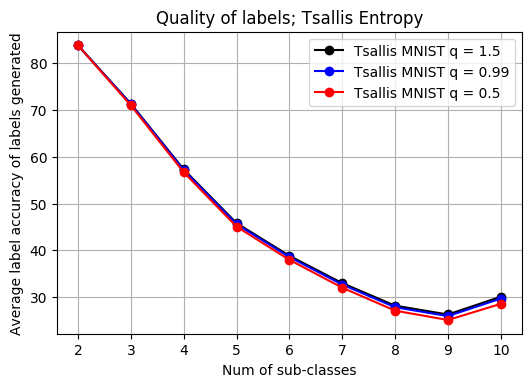

In [20]:
plt.figure(dpi = 100)
plt.title("Quality of labels; Tsallis Entropy")
plt.plot([i for i in range(2, 11)], lqual_mnist1, marker = "o", color = "k", label = "Tsallis MNIST q = 1.5")
plt.plot([i for i in range(2, 11)], lqual_mnist2, marker = "o", color = "b", label = "Tsallis MNIST q = 0.99")
plt.plot([i for i in range(2, 11)], lqual_mnist3, marker = "o", color = "r", label = "Tsallis MNIST q = 0.5")
plt.xlabel("Num of sub-classes")
plt.ylabel("Average label accuracy of labels generated")	
plt.legend(loc = "best")
plt.grid(True)
plt.savefig("tsallis_labels-acc_train5.pdf")

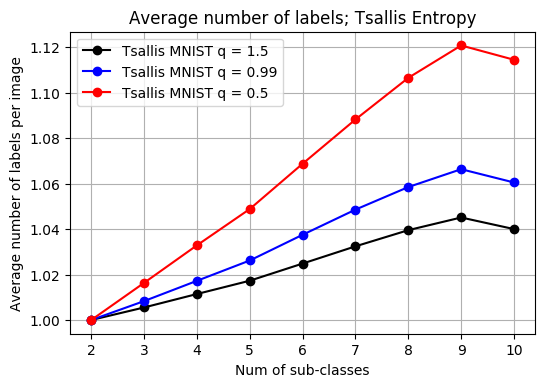

In [21]:
plt.figure(dpi = 100)
plt.title("Average number of labels; Tsallis Entropy")
plt.plot([i for i in range(2, 11)], lnum_mnist1, marker = "o", color = "k", label = "Tsallis MNIST q = 1.5")
plt.plot([i for i in range(2, 11)], lnum_mnist2, marker = "o", color = "b", label = "Tsallis MNIST q = 0.99")
plt.plot([i for i in range(2, 11)], lnum_mnist3, marker = "o", color = "r", label = "Tsallis MNIST q = 0.5")
plt.xlabel("Num of sub-classes")
plt.ylabel("Average number of labels per image")	
plt.legend(loc = "best")
plt.grid(True)
plt.savefig("tsallis_labels-num_train5.pdf")

### annの元のacc調整確認用

In [22]:
orig_A, lim_A = 5, 2000
model = LR().fit(train_imgs[:orig_A], train_labels[:orig_A])
acc = accuracy_score(test_labels, model.predict(test_imgs))
print(acc)

0.3173
